# Feature Engineering

In [10]:
import pathlib
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importando os dados do notebook limpo

In [11]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/luccahiratsuca/Github/Insper/4 Semestre/Machine Learning/ames-project/data


In [12]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [13]:
df = pd.read_pickle(clean_data_path)
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,31770.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
1,20,RH,80.0,11622.0,Reg,Lvl,Inside,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.021189,Roads,False,False,VinylSd,49.0,49.0,49.0
2,20,RL,81.0,14267.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
3,20,RL,93.0,11160.0,Reg,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.387390,Norm,False,False,BrkFace,42.0,42.0,42.0
4,60,RL,74.0,13830.0,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.278525,Norm,False,False,VinylSd,13.0,12.0,13.0


## Correlação

<Axes: >

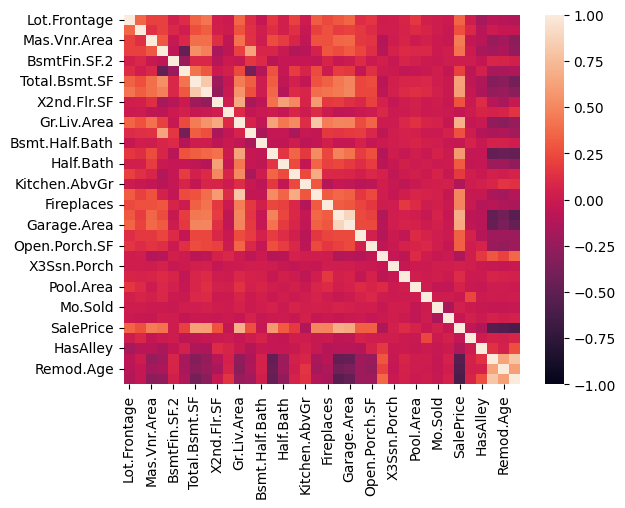

In [14]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, vmin=-1, vmax=1)

Analisando as colunas com maiores correlações com a variável alvo

In [15]:
maiores_corr = corr.index[abs(corr["SalePrice"])>0.5]
maiores_corr

Index(['Total.Bsmt.SF', 'X1st.Flr.SF', 'Gr.Liv.Area', 'Full.Bath',
       'Garage.Cars', 'Garage.Area', 'SalePrice', 'Garage.Age', 'Remod.Age',
       'House.Age'],
      dtype='object')

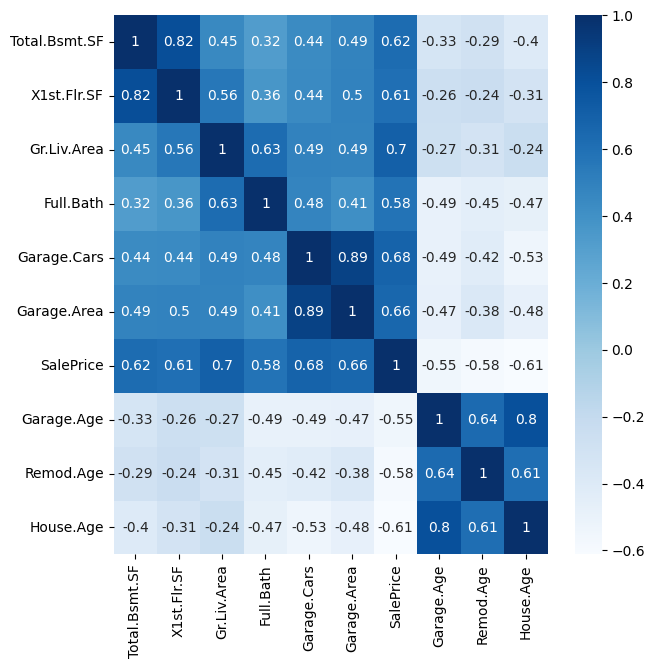

In [16]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(df[maiores_corr].corr(),annot=True,cmap="Blues")

In [17]:
corr.SalePrice.sort_values(ascending=False)

SalePrice          1.000000
Gr.Liv.Area        0.702893
Garage.Cars        0.682475
Garage.Area        0.659309
Total.Bsmt.SF      0.624716
X1st.Flr.SF        0.605974
Full.Bath          0.579069
TotRms.AbvGrd      0.496723
Fireplaces         0.489465
Mas.Vnr.Area       0.446062
BsmtFin.SF.1       0.407297
Lot.Frontage       0.344784
Open.Porch.SF      0.334686
Wood.Deck.SF       0.332611
Half.Bath          0.306286
X2nd.Flr.SF        0.280400
Bsmt.Full.Bath     0.268261
Lot.Area           0.267173
Bsmt.Unf.SF        0.195797
Bedroom.AbvGr      0.174658
Screen.Porch       0.108333
Pool.Area          0.054859
Mo.Sold            0.042859
X3Ssn.Porch        0.040288
BsmtFin.SF.2       0.012289
Misc.Val          -0.010276
Bsmt.Half.Bath    -0.026389
Yr.Sold           -0.028056
Low.Qual.Fin.SF   -0.042973
HasShed           -0.054273
HasAlley          -0.130591
Enclosed.Porch    -0.131509
Kitchen.AbvGr     -0.134768
Garage.Age        -0.548235
Remod.Age         -0.582060
House.Age         -0

A partir da análise de correlação acima, com apenas colunas as quais temos uma correlação maior que 0.5 com a feature alvo, podemos tirar algumas ideias como:

<div>

- `TotalBsmtSF` (Total Square Feet of Basement Area) & `1stFlrSF` (1stFlrSF: First Floor Square Feet)
    - Possuem correlação de 0,82: Como essa variáveis são áreas, podemos criar uma outra variável somando-as e assim não perder informação. 
    Além disso, nessa situação, se verificarmos se existem mais "andares", podemos verificar que ainda temos a: `2stFlrSF` (Second Floor Square Feet), ou seja, podemos junta-las e criar uma nova variável que seria a área total.

<br>

- `GarageCars` (Size of garage in car capacity) & `GarageArea` (Size of garage in square feet)
    - Possuem correlação de 0,89 (entre elas): Como essas variáveis são relacionadas ao tamanho da garagem, e, também temos a variável `Gr.Liv.Area`, a qual tem uma correção ainda maior que essas duas (0.70) com a variável target. Sabendo disso, podemos dropar essas duas (GarageCars e GarageArea) e manter apenas a `Gr.Liv.Area` (Above grade (ground) living area square feet).

</div>

**Resumindo**:

- Retiramos as colunas: `GarageCars`, `GarageArea`
- Juntamos as colunas: `TotalBsmtSF`,`1stFlrSF` e `2stFlrSF`